In [1]:
import os
import cv2
import skimage.io
from tqdm import tqdm
import zipfile
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the input data

In [57]:
TRAIN = os.path.join(os.getcwd(), "data", "prostate-cancer-grade-assessment", "train_images")
MASKS = os.path.join(os.getcwd(), "data", "prostate-cancer-grade-assessment", "train_label_masks")
OUT_TRAIN = os.path.join(os.getcwd(), "data", "train.zip")
OUT_MASKS = os.path.join(os.getcwd(), "data", "masks.zip")
sz = 128
N = 16

In [58]:
x_tot,x2_tot = [],[]
names = [name[:-10] for name in os.listdir(MASKS)]

In [59]:
name = names[1]
img = skimage.io.MultiImage(os.path.join(TRAIN, name + '.tiff'))[-1]
mask = skimage.io.MultiImage(os.path.join(MASKS, name + '_mask.tiff'))[-1]

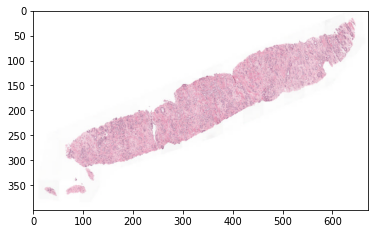

In [60]:
plt.imshow(img)
plt.show()

In [61]:
result = []
shape = img.shape
pad0,pad1 = (sz - shape[0]%sz)%sz, (sz - shape[1]%sz)%sz
img = np.pad(img,[[pad0//2,pad0-pad0//2],[pad1//2,pad1-pad1//2],[0,0]],
            constant_values=255)
mask = np.pad(mask,[[pad0//2,pad0-pad0//2],[pad1//2,pad1-pad1//2],[0,0]],
            constant_values=0)
img = img.reshape(img.shape[0]//sz,sz,img.shape[1]//sz,sz,3)
img = img.transpose(0,2,1,3,4).reshape(-1,sz,sz,3)
mask = mask.reshape(mask.shape[0]//sz,sz,mask.shape[1]//sz,sz,3)
mask = mask.transpose(0,2,1,3,4).reshape(-1,sz,sz,3)

In [51]:
idxs = np.argsort(img.reshape(img.shape[0], -1).sum(-1))[:N]
img = img[idxs]
mask = mask[idxs]
    

In [64]:
np.argsort(img.reshape(img.shape[0], -1).sum(-1))[:N]

array([ 9, 10, 13, 14,  8, 15,  5, 11,  4, 19, 12, 18,  7, 16, 17, 20])

# Visualize the table

In [2]:
table = pd.read_csv(os.path.join(os.getcwd(), "data", "train.csv"))

In [4]:
len(table)

10616

In [6]:
table.head()

,image_id,data_provider,isup_grade,gleason_score
0,0005f7aaab2800f6170c399693a96917,karolinska,0,0+0
1,000920ad0b612851f8e01bcc880d9b3d,karolinska,0,0+0
2,0018ae58b01bdadc8e347995b69f99aa,radboud,4,4+4
3,001c62abd11fa4b57bf7a6c603a11bb9,karolinska,4,4+4
4,001d865e65ef5d2579c190a0e0350d8f,karolinska,0,0+0


In [8]:
table.columns

Index(['image_id', 'data_provider', 'isup_grade', 'gleason_score'], dtype='object')

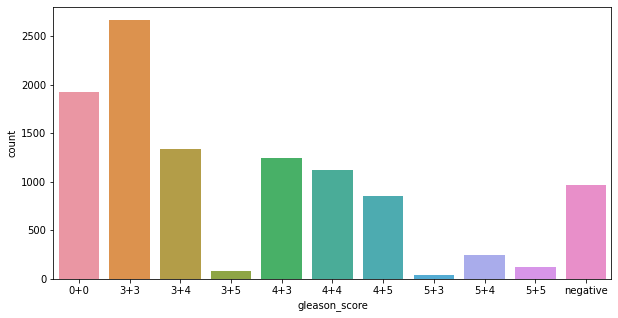

In [18]:
fig = plt.figure(figsize = (10, 5))
data = table.sort_values(["gleason_score"], ascending = [1])
sns.countplot("gleason_score", data = data)
plt.show()

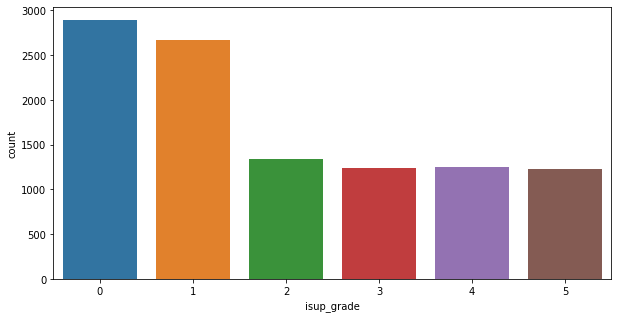

In [19]:
fig = plt.figure(figsize = (10, 5))
data = table.sort_values(["isup_grade"], ascending = [1])
sns.countplot("isup_grade", data = data)
plt.show()

In [8]:
table.groupby("isup_grade").count()["image_id"].min()

1224

In [12]:
list(table.columns)

['image_id', 'data_provider', 'isup_grade', 'gleason_score']